1. Title: Депрессия

2. Sources:
   (a) Origin:  This dataset is a subset of the https://www.kaggle.com/francispython/b-depression
   (b) Creator: Frankcc (https://www.kaggle.com/francispython)


3. Relevant Information:
   Набор данных участвует в анализе депрессии. 
   Данные представляли собой исследование условий жизни людей, проживающих в сельских районах.
   Цель исследования - определелить закономерность между условиями жизни и наличием депресии

4. Number of Instances: 1432

5. Number of Attributes: 23 (including the class attribute)

6. Attribute Information:
	1. Идентификатор человека (Survey_ID) - (numberical) 
	2. Идентификатор населенного пункта(Ville_id) - (numerical)   
	3. Пол (sex) - (categorical) 1 - male , 0 - female
	4. Возраст (Age) - (numerical)
	5. Семейный статус (Married) - (categorical) 1 - married, 0 - not married
	6. Число детей (Number_children) - (numerical)
	7. Уровень образования(education_level) - (numerical) - 0 -very low, 14 - very hight
	8. Число членов семьи (total_members) - (numerical)
	9. Активный доход (gained_asset) - (numerical)
    10.Пассивный доход (durable_asset) - (numerical)
	11.Сбережения (save_asset) - (numerical)
	12.Расходы на проживание (living_expenses) - (numerical)
	13.Прочие расходы (other_expenses) - (numerical)
	14.Доход - зарплата (incoming_salary) - (categorical) - 0 - no, 1 - yes
	15.Доход - собственная ферма (incoming_own_farm)- (categorical) - 0 - no, 1 - yes
	16.Доход - собственный бизнес (incoming_business) - (categorical) - 0 - no, 1 - yes
	17.Доход - не бизнес (incoming_no_business) - (categorical) - 0 - no, 1 - yes
	18.Доход - сельскохозяйственный (incoming_agricultural) - (numerical)
	19.Содержание фермы(farm_expenses) - (numerical)
	20.Основная работа (labor_primary )- (categorical) - 0 - no, 1 - yes
	21.Долгосрочные инвестиции (lasting_investment) - (numerical)
	22.Краткосрочный инвестиции (no_lasting_investmen) - (numerical)
    23.Депрессияdepressed: [ Zero: No depressed] or [One: depressed] 
7. Missing Attribute Values: Yes


Поставлена следующая задача классификации:

Необходимо предсказать, к какому из двух состояний человек предрасположен.

**Чтение данных**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = 'D:\depressed.csv'
data = pd.read_csv(path)

Таблица и ее размеры

In [3]:
data

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


Рассмотрим начало и конец датасета

In [4]:
data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [5]:
data.tail()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1428,231,12,1,33,0,4,8,5,81678391,22861940,...,0,1,0,1,20019212,16682677,0,69642126,13012488.0,0


Посмотрим более подробно на данные датасета:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

Можно заметить следующее:

    1. Первые два признака не имеют веса, поэтому можно от них избавиться
    2. Пропущенных значений есть (no_lasting_investmen)
    3. Все признаки уже количественные (Изначально в датасете уже была проведена обработка категориальных признаков)
    4. Многие столбцы содержат категориальные значения, но имеют тип 'int64'. Заменим данный тип на специальный, предназначенный для хранения категориальных значений.

In [7]:
categorical_indexes = [2, 4, 13, 14, 15, 16, 19]
data.iloc[:,2] = data.iloc[:,2].astype('category')
data.iloc[:,4] = data.iloc[:,4].astype('category')
data.iloc[:,13] = data.iloc[:,13].astype('category')
data.iloc[:,14] = data.iloc[:,14].astype('category')
data.iloc[:,15] = data.iloc[:,15].astype('category')
data.iloc[:,16] = data.iloc[:,16].astype('category')
data.iloc[:,19] = data.iloc[:,19].astype('category')

data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   sex                    1429 non-null   category
 1   Age                    1429 non-null   int64   
 2   Married                1429 non-null   category
 3   Number_children        1429 non-null   int64   
 4   education_level        1429 non-null   int64   
 5   total_members          1429 non-null   int64   
 6   gained_asset           1429 non-null   int64   
 7   durable_asset          1429 non-null   int64   
 8   save_asset             1429 non-null   int64   
 9   living_expenses        1429 non-null   int64   
 10  other_expenses         1429 non-null   int64   
 11  incoming_salary        1429 non-null   category
 12  incoming_own_farm      1429 non-null   category
 13  incoming_business      1429 non-null   category
 14  incoming_no_business   1429 non-null   c

In [9]:
data.describe()

,Age,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen,depressed
count,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.409000e+03,1429.000000
mean,34.777467,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,2.742471e+07,3.248257e+07,3.366632e+07,3.451039e+07,3.549153e+07,3.299222e+07,3.360385e+07,0.166550
std,13.986219,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,1.775137e+07,2.101528e+07,2.170266e+07,2.077846e+07,2.112372e+07,2.121621e+07,2.160228e+07,0.372704
min,17.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,1.729660e+05,2.629190e+05,1.729660e+05,3.251120e+05,2.715050e+05,7.429200e+04,1.263120e+05,0.000000
25%,25.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,2.339998e+07,2.088671e+07,2.098014e+07,2.322229e+07,2.279966e+07,2.001911e+07,2.064203e+07,0.000000
50%,30.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,2.820307e+07,3.002882e+07,3.136343e+07,2.841172e+07,2.829271e+07,0.000000
75%,42.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,2.339998e+07,3.843689e+07,4.051889e+07,4.003842e+07,4.348584e+07,3.982686e+07,4.151762e+07,0.000000
max,91.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,9.992676e+07,9.929528e+07,9.982380e+07,9.978910e+07,9.965119e+07,9.944667e+07,9.965119e+07,1.000000


Вычислим матрицу корреляции для количественных признаков и используем визуальный образ данной матрицы:

In [10]:
corr_mat = data.corr()
corr_mat

,Age,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen,depressed
Age,1.000000,-0.138448,-0.377146,-0.073936,0.008316,0.045368,-0.026685,-0.036599,0.026270,-0.009173,-0.009428,0.045714,-0.023430,0.105721
Number_children,-0.138448,1.000000,0.175165,0.781731,0.016195,-0.014358,0.027850,-0.000618,0.001611,0.018512,0.052273,0.042988,0.014344,0.003823
education_level,-0.377146,0.175165,1.000000,0.130236,0.014534,-0.011658,0.046626,0.010132,-0.043732,-0.054515,0.010648,0.005361,0.013849,-0.098043
total_members,-0.073936,0.781731,0.130236,1.000000,0.015472,-0.040372,0.036630,-0.005937,0.009988,0.026157,0.072907,0.044341,0.048028,0.035056
gained_asset,0.008316,0.016195,0.014534,0.015472,1.000000,-0.005730,-0.004477,0.073981,0.039911,0.028656,0.058569,0.033085,0.030779,-0.004402
durable_asset,0.045368,-0.014358,-0.011658,-0.040372,-0.005730,1.000000,-0.038218,0.020984,0.086410,0.024395,0.027892,0.246894,0.022460,0.040505
save_asset,-0.026685,0.027850,0.046626,0.036630,-0.004477,-0.038218,1.000000,0.023722,0.028680,0.022900,0.040168,0.034959,0.028610,0.009059
living_expenses,-0.036599,-0.000618,0.010132,-0.005937,0.073981,0.020984,0.023722,1.000000,0.055057,0.115553,0.003512,0.040247,0.047035,-0.028213
other_expenses,0.026270,0.001611,-0.043732,0.009988,0.039911,0.086410,0.028680,0.055057,1.000000,0.071319,0.042088,0.048173,0.018902,0.017117
incoming_agricultural,-0.009173,0.018512,-0.054515,0.026157,0.028656,0.024395,0.022900,0.115553,0.071319,1.000000,0.093706,-0.003214,0.066920,-0.019147


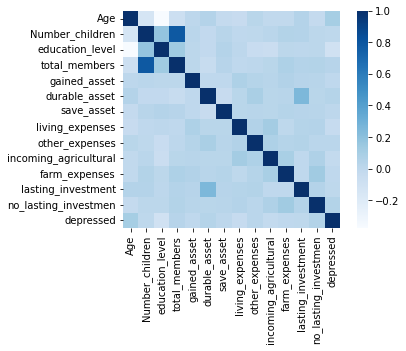

In [11]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

Найдем сильно коррелирующие признаки (с корреляцией > 0.5):

In [12]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

Number_children  total_members    0.781731
dtype: float64

Можно заметить, что большая корреляция наблюдается между числом детей и количеством членов семьи. Очевидная прямопропорциональная зависимость.

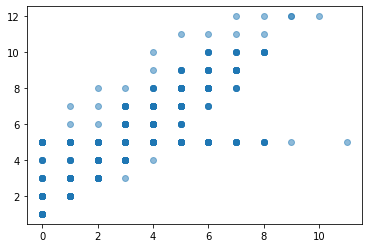

In [16]:
plt.scatter(data['Number_children'], data['total_members'], alpha = 0.5)
pass

**Заполнение пропущенных значений**

In [17]:
data.isna().sum()

sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих количественным признакам:

In [18]:
data['no_lasting_investmen'].fillna(data['no_lasting_investmen'].median(axis = 0), inplace = True)


In [19]:
data.isna().sum()

sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

In [20]:
data.describe()

,Age,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen,depressed
count,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1429.000000
mean,34.777467,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,2.742471e+07,3.248257e+07,3.366632e+07,3.451039e+07,3.549153e+07,3.299222e+07,3.352952e+07,0.166550
std,13.986219,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,1.775137e+07,2.101528e+07,2.170266e+07,2.077846e+07,2.112372e+07,2.121621e+07,2.145955e+07,0.372704
min,17.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,1.729660e+05,2.629190e+05,1.729660e+05,3.251120e+05,2.715050e+05,7.429200e+04,1.263120e+05,0.000000
25%,25.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,2.339998e+07,2.088671e+07,2.098014e+07,2.322229e+07,2.279966e+07,2.001911e+07,2.074791e+07,0.000000
50%,30.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,2.820307e+07,3.002882e+07,3.136343e+07,2.841172e+07,2.829271e+07,0.000000
75%,42.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,2.339998e+07,3.843689e+07,4.051889e+07,4.003842e+07,4.348584e+07,3.982686e+07,4.088368e+07,0.000000
max,91.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,9.992676e+07,9.929528e+07,9.982380e+07,9.978910e+07,9.965119e+07,9.944667e+07,9.965119e+07,1.000000


Из данной таблицы видно, что пропущенных значений больше нет.

**Обработка категориальных признаков**

Разделим признаки на количественные и категориальные():

In [21]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
numerical_columns.remove('depressed')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

Рассмотрим категориальные признаки и применим стандартизацию для бинарных  и векторизацию для небинарных

In [22]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)


['sex', 'Married', 'incoming_salary', 'incoming_own_farm', 'incoming_business', 'incoming_no_business', 'labor_primary'] []


In [23]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in data[col].unique():
        if uniq == data[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

sex : 1, 0.
Married : 1, 0.
incoming_salary : 0, 1.
incoming_own_farm : 0, 1.
incoming_business : 0, 1.
incoming_no_business : 0, 1.
labor_primary : 0, 1.


In [24]:
for col in binary_columns:
    data[col] = data[col].astype('object')
    k = 0
    for uniq in data[col].unique():
        data.at[data[col] == uniq, col] = k
        k +=1 
for col in binary_columns:
    print(data[col].describe(), end = '\n\n')

count     1429
unique       1
top          1
freq      1429
Name: sex, dtype: int64

count     1429
unique       1
top          1
freq      1429
Name: Married, dtype: int64

count     1429
unique       2
top          0
freq      1172
Name: incoming_salary, dtype: int64

count     1429
unique       2
top          0
freq      1069
Name: incoming_own_farm, dtype: int64

count     1429
unique       2
top          0
freq      1275
Name: incoming_business, dtype: int64

count     1429
unique       2
top          0
freq      1057
Name: incoming_no_business, dtype: int64

count     1429
unique       2
top          0
freq      1124
Name: labor_primary, dtype: int64



**Нормализация количественных признаков**

Имеем следующие количественные признаки:

In [26]:
target = data['depressed']
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen
count,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03
mean,34.777467,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,2.742471e+07,3.248257e+07,3.366632e+07,3.451039e+07,3.549153e+07,3.299222e+07,3.352952e+07
std,13.986219,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,1.775137e+07,2.101528e+07,2.170266e+07,2.077846e+07,2.112372e+07,2.121621e+07,2.145955e+07
min,17.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,1.729660e+05,2.629190e+05,1.729660e+05,3.251120e+05,2.715050e+05,7.429200e+04,1.263120e+05
25%,25.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,2.339998e+07,2.088671e+07,2.098014e+07,2.322229e+07,2.279966e+07,2.001911e+07,2.074791e+07
50%,30.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,2.820307e+07,3.002882e+07,3.136343e+07,2.841172e+07,2.829271e+07
75%,42.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,2.339998e+07,3.843689e+07,4.051889e+07,4.003842e+07,4.348584e+07,3.982686e+07,4.088368e+07
max,91.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,9.992676e+07,9.929528e+07,9.982380e+07,9.978910e+07,9.965119e+07,9.944667e+07,9.965119e+07


Выполним стандартизацию (линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению) всех количественных признаков:

In [27]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [28]:
data_numerical.describe()

,Age,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen
count,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03
mean,3.224231e-17,-6.922384e-17,-2.622115e-17,9.574605e-17,-1.184031e-16,7.066115e-17,1.527431e-16,-1.760508e-16,-1.323877e-16,3.022231e-17,-1.910454e-16,-5.345231e-17,-1.824992e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.271070e+00,-1.538105e+00,-2.629420e+00,-2.222007e+00,-1.662265e+00,-1.487625e+00,-1.535191e+00,-1.533153e+00,-1.543284e+00,-1.645227e+00,-1.667321e+00,-1.551546e+00,-1.556566e+00
25%,-6.990786e-01,-4.711381e-01,-2.350560e-01,-5.425741e-01,-5.172360e-01,-4.336926e-01,-2.267277e-01,-5.517820e-01,-5.845455e-01,-5.432598e-01,-6.008350e-01,-6.114713e-01,-5.956138e-01
50%,-3.415839e-01,6.234554e-02,1.069960e-01,1.723701e-02,-2.356598e-01,-2.374337e-01,-2.267277e-01,-2.755272e-01,-2.517323e-01,-2.156835e-01,-1.954246e-01,-2.158961e-01,-2.440317e-01
75%,5.164036e-01,5.958292e-01,4.490479e-01,5.770481e-01,1.765775e-01,-3.323612e-02,-2.267277e-01,2.833329e-01,3.157477e-01,2.660464e-01,3.784523e-01,3.221427e-01,3.426990e-01
max,4.019852e+00,4.330215e+00,3.527516e+00,3.935915e+00,3.268356e+00,3.989853e+00,4.084306e+00,3.179244e+00,3.048358e+00,3.141652e+00,3.037329e+00,3.132249e+00,3.081224e+00


**Формирование таблицы**

Соединяем все преобразованные столбцы в одну таблицу:

In [29]:
data = pd.concat((data_numerical, data[binary_columns]), axis = 1)
print(data.shape)

(1429, 20)


Теперь она имеет следующий вид:

In [30]:
data.describe()

,Age,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen
count,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03,1.429000e+03
mean,3.224231e-17,-6.922384e-17,-2.622115e-17,9.574605e-17,-1.184031e-16,7.066115e-17,1.527431e-16,-1.760508e-16,-1.323877e-16,3.022231e-17,-1.910454e-16,-5.345231e-17,-1.824992e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.271070e+00,-1.538105e+00,-2.629420e+00,-2.222007e+00,-1.662265e+00,-1.487625e+00,-1.535191e+00,-1.533153e+00,-1.543284e+00,-1.645227e+00,-1.667321e+00,-1.551546e+00,-1.556566e+00
25%,-6.990786e-01,-4.711381e-01,-2.350560e-01,-5.425741e-01,-5.172360e-01,-4.336926e-01,-2.267277e-01,-5.517820e-01,-5.845455e-01,-5.432598e-01,-6.008350e-01,-6.114713e-01,-5.956138e-01
50%,-3.415839e-01,6.234554e-02,1.069960e-01,1.723701e-02,-2.356598e-01,-2.374337e-01,-2.267277e-01,-2.755272e-01,-2.517323e-01,-2.156835e-01,-1.954246e-01,-2.158961e-01,-2.440317e-01
75%,5.164036e-01,5.958292e-01,4.490479e-01,5.770481e-01,1.765775e-01,-3.323612e-02,-2.267277e-01,2.833329e-01,3.157477e-01,2.660464e-01,3.784523e-01,3.221427e-01,3.426990e-01
max,4.019852e+00,4.330215e+00,3.527516e+00,3.935915e+00,3.268356e+00,3.989853e+00,4.084306e+00,3.179244e+00,3.048358e+00,3.141652e+00,3.037329e+00,3.132249e+00,3.081224e+00


**Разделение данных на обучающую и тестовую выборки**

In [31]:
X = data
y = target
N, d = X.shape
N, d

(1429, 20)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 777)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(1286, 143)

**Метод k-ближайших соседей (kNN)**

Переберем количество соседей от 1 до 100 и определим оптимальное (с наименьшей ошибкой кросс-валидации) количество:

In [33]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 101)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print('Ошибка на кросс-валидации: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Ошибка на кросс-валидации:  0.1671854734111543
Оптимальное количество соседей:  30


Обучим и запустим kNN для оптимального среди рассмотренных количества соседей:

In [34]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.1671850699844479
Ошибка на тестовой выборке:  0.16083916083916083


**SVC**

In [35]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.1671850699844479
Ошибка на тестовой выборке:  0.16083916083916083


**Random Forest**

In [36]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.01010886469673406
Ошибка на тестовой выборке:  0.1888111888111888


**Extremely Randomized Trees**

In [37]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.01010886469673406
Ошибка на тестовой выборке:  0.1888111888111888


**AdaBoost**

In [38]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.13919129082426127
Ошибка на тестовой выборке:  0.2097902097902098


**GBT**

In [39]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.12674961119751166
Ошибка на тестовой выборке:  0.21678321678321677


**Выводы о результатах классификации:**

    1. Для оптимального (с наименьшей ошибкой кросс-валидации) количества соседей было получено, что метод kNN ошибся на обучающей выборке в 16.7% случаев, а на тестовой - в 16.1%
    2. Для метода опорных векторов ошибка фналогична kNN.
    3. Для классификаторов случайный лес и экстремально случайный лес ошибка на обучащей выборке 1%, а на тестовой около 18.9%.
    4. Для алгоритма AdaBoost ошибка на обучающей выборке составила 14%, а на тестовой – 21%.
    5. Для градиентного бустинга деревьев решений ошибка на обучающей и тестовой выборках составила 12.7% и 21.7% соответственно.

Ошибка на тестовой выборке большая. Это возможно связать с тем, что у людей существует разная предрасположенность к возникновению депрессий. Большое влияние оказывает характер, который в данных реалях рассмотреть невозможно.

Так же на точность классификации могла отрицательно повлиять несбалансированность классов

**Нейронная сеть**

Разделение данных на обучающую и тестовую выборки

In [40]:
N_train, N_test

(1286, 143)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = y, random_state = 42)

In [42]:
X_train.shape, X_test.shape

((1286, 20), (143, 20))

**Первый способ подбора гиперпараметров**

**Подбор оптимального параметра регуляризации alpha (для 1 скрытого слоя из 50 нейронов)**

In [43]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes = 50,
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

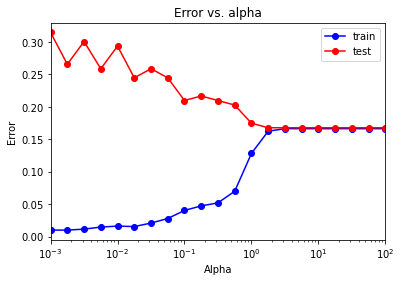

In [44]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

In [45]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.01010886469673406
Минимальная ошибка на тестовой выборке:  0.16783216783216784


In [46]:
alpha_local_opt = alpha_arr[test_err == min_test_err][0]
print('Оптимальное значение alpha: ', alpha_local_opt)

Оптимальное значение alpha:  1.7782794100389228


**Обучение классификатора при оптимальном значении alpha (для 1 скрытого слоя из 50 нейронов)**

In [47]:
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = 50,
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1.7782794100389228,
              hidden_layer_sizes=50, max_iter=1000, random_state=42,
              solver='lbfgs')

In [48]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.1625194401244168
Ошибка на тестовой выборке:  0.16783216783216784


**Подбор количества нейронов одного скрытого слоя для оптимального (для 1 скрытого слоя из 50 нейронов) значения alpha**

In [49]:
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = size,
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 10.3 s


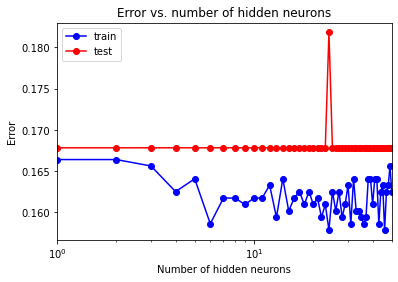

In [50]:
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Error')
plt.legend()
pass

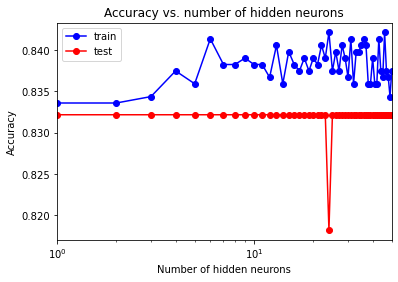

In [51]:
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Accuracy')
plt.legend()
pass

In [52]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.1578538102643857
Минимальная ошибка на тестовой выборке:  0.16783216783216784


In [53]:
hidden_layer_local_opt_1 = hidden_layer[test_err == min_test_err][0]
print('Оптимальное значение количества нейронов скрытого слоя: ', hidden_layer_local_opt_1)

Оптимальное значение количества нейронов скрытого слоя:  1


**Обучение нейронной сети при оптимальном значении alpha (для 1 скрытого слоя из 50 нейронов) и оптимальном количестве нейронов первого скрытого слоя (для данного alpha)**

In [54]:
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = hidden_layer_local_opt_1,
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1.7782794100389228,
              hidden_layer_sizes=1, max_iter=1000, random_state=42,
              solver='lbfgs')

In [55]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.16640746500777606
Ошибка на тестовой выборке:  0.16783216783216784


**Подбор количества нейронов второго скрытого слоя при оптимальном значении alpha (для 1 скрытого слоя из 50 нейронов) и оптимальном количестве нейронов первого скрытого слоя (для данного alpha)**

In [56]:
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                              hidden_layer_sizes = (hidden_layer_local_opt_1, size),
                              solver = 'lbfgs', 
                              max_iter = 1000, 
                              activation = 'logistic',
                              random_state = 42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

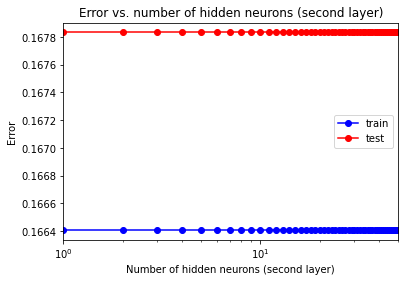

In [57]:
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Error')
plt.legend()
pass

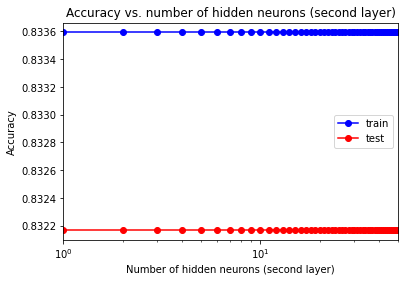

In [58]:
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Accuracy')
plt.legend()
pass

In [59]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.16640746500777606
Минимальная ошибка на тестовой выборке:  0.16783216783216784


In [60]:
hidden_layer_local_opt_2 = hidden_layer[test_err == min_test_err][0]
print('Оптимальное значение количества нейронов второго скрытого слоя: ', hidden_layer_local_opt_2)

Оптимальное значение количества нейронов второго скрытого слоя:  1


**Обучение нейронной сети при оптимальном значении alpha (для 1 скрытого слоя из 50 нейронов), оптимальных количествах нейронов первого и второго скрытых слоев**

In [61]:
mlp_model = MLPClassifier(alpha = alpha_local_opt, 
                          hidden_layer_sizes = (hidden_layer_local_opt_1, hidden_layer_local_opt_2),
                          solver = 'lbfgs', 
                          max_iter = 1000, 
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1.7782794100389228,
              hidden_layer_sizes=(1, 1), max_iter=1000, random_state=42,
              solver='lbfgs')

In [62]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.16640746500777606
Ошибка на тестовой выборке:  0.16783216783216784


**Второй способ подбора гиперпараметров**

**Одновременный перебор alpha и количества нейронов скрытого слоя (для нейронной сети с одним скрытым слоем)**

In [67]:
hidden_layer = np.arange(hidden_layer_local_opt_1, hidden_layer_local_opt_1 + 2)
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

opt_params = []

for size in hidden_layer:
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, 
                                  hidden_layer_sizes = size,
                                  solver = 'lbfgs', 
                                  max_iter = 1000, 
                                  activation = 'logistic',
                                  random_state = 42)


        mlp_model.fit(X_train, y_train)

        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)

        train_err.append(np.mean(y_train != y_train_pred))
        test_err.append(np.mean(y_test != y_test_pred))
        train_acc.append(accuracy_score(y_train, y_train_pred))
        test_acc.append(accuracy_score(y_test, y_test_pred))
        
        params = {'alpha': alpha, 'hidden_layer': size} 
        opt_params.append(params)

In [68]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.15241057542768274
Минимальная ошибка на тестовой выборке:  0.16783216783216784


In [69]:
index_opt = 0
for index in range(len(test_err)):
    if test_err[index] == min_test_err:
        index_opt = index
        break
        
hidden_layer_opt = opt_params[index_opt]['hidden_layer']
print('Оптимальное значение количества нейронов скрытого слоя: ', hidden_layer_opt)

alpha_opt = opt_params[index_opt]['alpha']
print('Оптимальное значение alpha: ', alpha_opt)

Оптимальное значение количества нейронов скрытого слоя:  1
Оптимальное значение alpha:  0.001


**Одновременный перебор alpha, количества нейронов первого и второго скрытых слоев**

In [71]:
hidden_layer_first = np.arange(hidden_layer_local_opt_1, hidden_layer_local_opt_1 + 2)
hidden_layer_second = np.arange(hidden_layer_local_opt_2, hidden_layer_local_opt_2 + 2)
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

opt_params = []

for size_first in hidden_layer_first:
    for size_second in hidden_layer_second:
        for alpha in alpha_arr:
            mlp_model = MLPClassifier(alpha = alpha, 
                                      hidden_layer_sizes = (size_first, size_second), 
                                      solver = 'lbfgs', 
                                      max_iter = 1000, 
                                      activation = 'logistic',
                                      random_state = 42)


            mlp_model.fit(X_train, y_train)

            y_train_pred = mlp_model.predict(X_train)
            y_test_pred = mlp_model.predict(X_test)

            train_err.append(np.mean(y_train != y_train_pred))
            test_err.append(np.mean(y_test != y_test_pred))
            train_acc.append(accuracy_score(y_train, y_train_pred))
            test_acc.append(accuracy_score(y_test, y_test_pred))
            
            params = {'alpha': alpha, 'hidden_layer_first': size_first, 'hidden_layer_second': size_second} 
            opt_params.append(params)

In [72]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Минимальная ошибка на обучающей выборке: ', min_train_err)
print('Минимальная ошибка на тестовой выборке: ', min_test_err)

Минимальная ошибка на обучающей выборке:  0.13530326594090203
Минимальная ошибка на тестовой выборке:  0.16783216783216784


In [73]:
index_opt = 0
for index in range(len(test_err)):
    if test_err[index] == min_test_err:
        index_opt = index
        break
        
hidden_layer_opt_1 = opt_params[index_opt]['hidden_layer_first']
print('Оптимальное значение количества нейронов первого скрытого слоя: ', hidden_layer_opt_1)

hidden_layer_opt_2 = opt_params[index_opt]['hidden_layer_second']
print('Оптимальное значение количества нейронов второго скрытого слоя: ', hidden_layer_opt_2)

alpha_opt = opt_params[index_opt]['alpha']
print('Оптимальное значение alpha: ', alpha_opt)

Оптимальное значение количества нейронов первого скрытого слоя:  1
Оптимальное значение количества нейронов второго скрытого слоя:  1
Оптимальное значение alpha:  0.001


**Выводы**

        1. Наименьшая ошибка на тестовой выборке составила 16.78% (результат лучше, чем для других классификаторов).
        2. Данный результат был достигнут при параметре alpha ≈ 0.001, количестве нейронов первого и второго скрытых слоев, равных 1 и 1 соответственно.
        3. Поскольку качество обучения нейронных сетей зависит от количества входных данных, то при увеличении обучающей выборки может быть достигнут результат, лучший предыдущего.
        4. Гиперпараметры перебирались в узких диапазонах. При увеличении диапазонов может быть достигнута меньшая ошибка.

**Метод главных компонент (PCA)**

Посмотрим на значения корреляций:

In [74]:
new_data = pd.DataFrame(data = X)
corr_mat = new_data.corr()
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Number_children  total_members    0.781731
dtype: float64

Запустим метод главных компонент для уменьшения числа признаков. Будем выбирать количество главных компонент таким образом, чтобы объясненная дисперсия была не меньше некоторого заданного уровня – 0.85.

In [75]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 0.85) # сохраняем 85% дисперсии
pca_model.fit(X)
X_proj = pca_model.transform(X)
print(X.shape)
print(X_proj.shape)

(1429, 20)
(1429, 11)


Количество признаком уменьшилось с 20 до 11

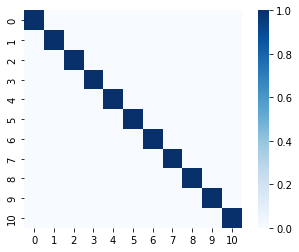

In [76]:
new_data = pd.DataFrame(data = X_proj)
corr_mat = new_data.corr()
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

Оставшиеся признаки не коррелируют друг с другом.



**Балансировка классов**


Прежде чем переходить к балансировке классов, посмотрим, какое процентное соотношение имеется на данный момент:

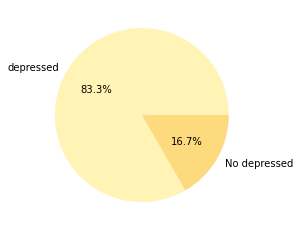

In [78]:
plt.pie(y.value_counts(), labels = ["depressed", "No depressed"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

In [79]:
y.value_counts()

0    1191
1     238
Name: depressed, dtype: int64

In [80]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_miss, y_miss = nm.fit_resample(new_data, target.ravel())

In [83]:
y_miss

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [86]:
print('После применения метода кол-во меток со значением "depressed": {}'.format(sum(y_miss == 0)))
print('После применения метода кол-во меток со значением "No depressed": {}'.format(sum(y_miss == 1)))

После применения метода кол-во меток со значением "depressed": 238
После применения метода кол-во меток со значением "No depressed": 238


Разобьем данные на обучающую и тестовую выборки в пропорции 9:1 (90% – обучающая выборка, 10% – тестовая):

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_miss, y_miss, test_size = 0.1, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(428, 48)

**Метод k-ближайших соседей (kNN)**

Переберем количество соседей от 1 до 20 и определим оптимальное (с наименьшей ошибкой кросс-валидации) количество:

In [88]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print('Ошибка на кросс-валидации: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Ошибка на кросс-валидации:  0.2267305061559507
Оптимальное количество соседей:  2


In [89]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.14485981308411214
Ошибка на тестовой выборке:  0.1875


**SVC**

In [90]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.14719626168224298
Ошибка на тестовой выборке:  0.10416666666666667


**Random Forest**

In [91]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.030373831775700934
Ошибка на тестовой выборке:  0.16666666666666666


**Extremely Randomized Trees**

In [92]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.030373831775700934
Ошибка на тестовой выборке:  0.14583333333333334


**AdaBoost**

In [93]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на aобучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на aобучающей выборке:  0.056074766355140186
Ошибка на тестовой выборке:  0.1875


**GBT**

In [94]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.04205607476635514
Ошибка на тестовой выборке:  0.14583333333333334


**Выводы**

        1. Метод главных компонент и балансировка классов не помогли, ошибка на тестовой выборке хоть и стала в среднем меньше, однако лучший результат был достигнут в предыдущей главе. Скорее всего это объясняется тем, что в результате работы PCA были выкинуты важные для классификации признаки (было 20 признаков, о остались всего 11 , т.е. примерно половина от изначальных). Количество главных компонент выбиралось таким образом, чтобы объясненная дисперсия была не меньше 0.85.
        2. Несмотря на то, что при применении PCA результаты ухудшились, из выборки были исключены коррелирующие признаки. Вполне возможно, что при переборе гиперпараметров PCA можно добиться гораздо лучших результатов.
        3. После применения PCA наименьшая ошибка на тестовой выборке была достигнула классификатором Random Forest и Extremely Randomized Trees.
        4. Классификатор Extremely Randomized Trees (n_estimators = 100) оказался лучшим для начальной выборки (рассматривается выборка до балансировки и применения PCA.
        5. Классификатор AdaBoost оказался худшим для начальной выборки (рассматривается выборка до балансировки и применения PCA). Но данный метод запускался только один раз и с параметром n_estimators = 100. Предположительно ошибку можно значительно уменьшить, осуществив подбор гиперпараметров.